In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# read the data with numpy
data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/optdigits.tra', 
                     delimiter=',')
data

array([[ 0.,  1.,  6., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  7.],
       ...,
       [ 0.,  0.,  3., ...,  0.,  0.,  6.],
       [ 0.,  0.,  6., ...,  5.,  0.,  6.],
       [ 0.,  0.,  2., ...,  0.,  0.,  7.]])

In [3]:
data.shape # 3823 rows and 65 columns

(3823, 65)

In [4]:
# create features and labels matrices
X = data[:, :-1] # features
y = data[:, -1] # labels
y = y.astype('int64') # change label data type from float to an integer

print(X.shape)
print(y.shape)

(3823, 64)
(3823,)


## Question 1 Solution

In [5]:
def pca(features, k_dimension):
    """This function does principal component analysis for the given features
    and dimensions. Features argument should be given as a numpy array and 
    k_dimension as integer."""

    # calculation of covariance matrix for given features:
    covariance = (features - np.mean(features, axis=0)).T @ \
    (features - np.mean(features, axis=0)) / len(features)

    # w --> eigen values
    # v --> eigen vectors
    w, v = np.linalg.eig(covariance) # calculate eigen values and eigen vectors
    v_reduce = v[:, :k_dimension]; # get the top k_dimension eigen vectors
    Z = X @ v_reduce; # compute the new features
    return Z

In [6]:
Z = pca(X, 2) # transformed data points are calculated with pca function

# transformed data points are concatenated with labels in the form dataframe
transformed_data = pd.DataFrame(
    {"Z1": Z[:, 0],
     "Z2": Z[:, 1],
     "Class": y})

transformed_data.head()

,Z1,Z2,Class
0,11.301387,6.407810,0
1,15.375829,14.769467,0
2,-19.991131,-9.019653,7
3,-14.019146,-15.906339,4
4,19.950097,8.608238,6


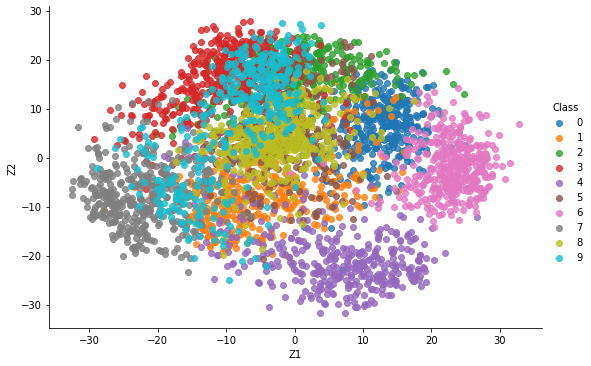

In [7]:
sns.lmplot(x="Z1", y="Z2", data=transformed_data, fit_reg=False, hue='Class', 
           legend=True, height=5, aspect=1.5);

In [8]:
# In this function we will be using singular value decomposition method to
# calculate the eigen vectors with np.linalg.svd instead of np.linalg.eig

def pca(features, k_dimension):
    """This function does principal component analysis for the given features
    and dimensions. Features argument should be given as a numpy array and 
    k_dimension as integer."""

    # calculation of covariance matrix for given features:
    covariance = (features - np.mean(features, axis=0)).T @ \
    (features - np.mean(features, axis=0)) / len(features)

    # with singular value decomposition method of numpy calculate:
    # U --> eigen vectors, principal components of variation in the data
    # S --> diagonal matrix  
    U, S, V = np.linalg.svd(covariance) 
    U_reduce = U[:, :k_dimension]; # get the top k_dimension eigen vectors
    Z = X @ U_reduce; # compute the new features
    return Z

In [9]:
Z = pca(X, 2) # transformed data points are calculated with pca function

# transformed data points are concatenated with labels in the form dataframe
transformed_data = pd.DataFrame(
    {"Z1": Z[:, 0],
     "Z2": Z[:, 1],
     "Class": y})

transformed_data.head()

,Z1,Z2,Class
0,11.301387,-6.407810,0
1,15.375829,-14.769467,0
2,-19.991131,9.019653,7
3,-14.019146,15.906339,4
4,19.950097,-8.608238,6


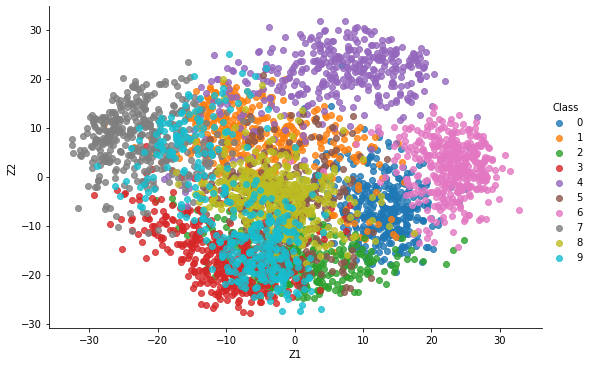

In [10]:
sns.lmplot(x="Z1", y="Z2", data=transformed_data, fit_reg=False, hue='Class', 
           legend=True, height=5, aspect=1.5);

## Question 2 Solution

In [11]:
def lda(features, labels, k_dimension):
    """Features and labels arguments should be given as numpy array and
    k_dimension as integer"""
    rows, cols = features.shape # get the number of rows and columns of features

    # determine the unique labels and number of features belongs to them
    unique_labels, unique_label_counts = np.unique(labels, return_counts=True)

    # determine the within scattering matrix --> s_w
    s_w = np.zeros((cols, cols))
    for i in unique_labels: # loop over the unique labels
        x_temp = features[labels == i] # get features of each unique label
        # calculate covariance matrix of features belonging to each unique label
        # and add it to s_w matrix 
        s_w += (x_temp - np.mean(x_temp, axis=0)).T @ \
         (x_temp - np.mean(x_temp, axis=0)) / len(x_temp)

    mean_class = []
    for i in unique_labels: # loop over the unique labels
        # append the mean of each class to mean_class list:
        mean_class.append(np.mean(features[labels == i], axis=0))

    mean_overall = np.mean(features, axis=0) # overall mean

    # determine the between scattering matrix --> s_b
    s_b = np.zeros((cols, cols))
    for i in range(len(unique_labels)): # loop over the number of unique labels
        # subtract mean of a class from overall mean
        mean_diff = mean_class[i] - mean_overall
        # calculate the between scattering matrix:
        s_b += ((mean_diff.reshape(cols, 1)) * (mean_diff.reshape(1, cols))) * \
                                                        unique_label_counts[i]

    # eigenvalues and eigenvectors with singular value decomposition
    u, s, vh = np.linalg.svd(np.linalg.pinv(s_w) @ s_b)

    Z = features @ u[:, :k_dimension] # compute the projected features
    return Z

In [12]:
Z = lda(X, y, 2)

new_data = pd.DataFrame(Z)
new_data['class'] = y
new_data.columns = ["Z1", "Z2", "Class"]
new_data.head()

,Z1,Z2,Class
0,-0.086644,2.100406,0
1,-0.171167,2.675766,0
2,0.025064,-1.483235,7
3,-0.706330,-0.134602,4
4,-0.316130,1.199784,6


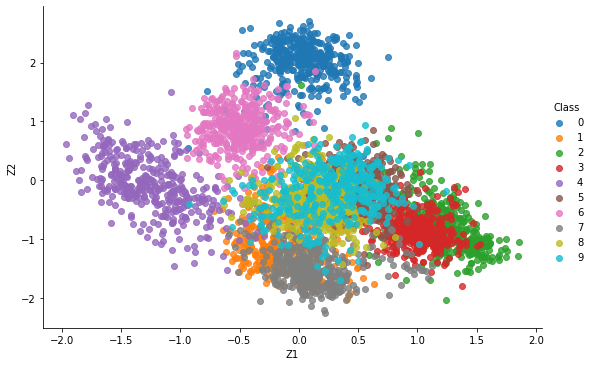

In [13]:
sns.lmplot(x="Z1", y="Z2", data=new_data, fit_reg=False, hue='Class', 
           legend=True, height=5, aspect=1.5);

## Question 3 Solution

In [17]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cluster_data.csv", 
                   index_col=0)
df.rename(columns={"0": "x1", "1": "x2"}, inplace=True)
df.head()

,x1,x2
0,2.336858,2.265735
1,1.327879,1.535489
2,2.822353,2.418167
3,1.521233,1.140626
4,2.953332,2.601195


### Calculation for 2 clusters:

In [18]:
def k_means(dataset, k):
    """dataset argument should be given as numpy array, k as an integer"""
    import random

    # randomly select initial centroids
    np.random.shuffle(dataset) # mix the dataset
    initial_centroids = dataset[:k, :]

    # find closest centroids
    indexes = [] 
    for i in range(len(dataset)): # Go over every example
        distances = []
        for j in range(k): # loop over the clusters
            # calculate the distance
            #distances.append(np.linalg.norm(dataset[i, :]-initial_centroids[j, :]))
            distances.append(sum((dataset[i, :] - initial_centroids[j, :])**2)) 
        # find closest centroid and store the centroid of closest to example i 
        indexes.append(distances.index(min(distances))) 
    indexes = np.array(indexes)
    
    # compute the new centroids by computing the means of the data points 
    # assigned to each centroid.

    centroids = np.zeros((k, dataset.shape[1]))
    for i in range(k): # Go over every centroid
        centroids[i, :] = np.mean(dataset[indexes[indexes==i], :], axis=0)
    
    # find the labels using the determined centroids with k-means algorithm
    indexes = [] 
    for i in range(len(dataset)): # Go over every example
        distances = []
        for j in range(k): # loop over the clusters
            # calculate the distance
            distances.append(sum((dataset[i, :] - centroids[j, :])**2)) 
        # find closest centroid and store the centroid of closest to example i 
        indexes.append(distances.index(min(distances))) 
    indexes = np.array(indexes)

    return centroids, indexes

centroids, idx = k_means(df.values, 2)
centroids

array([[2.82235335, 2.41816746],
       [4.15705993, 1.20127191]])

In [20]:
df["class"] = idx
df.head()

,x1,x2,class
0,2.822353,2.418167,0
1,4.157060,1.201272,1
2,0.792431,0.644406,0
3,4.669044,1.956714,1
4,1.325790,1.406291,0


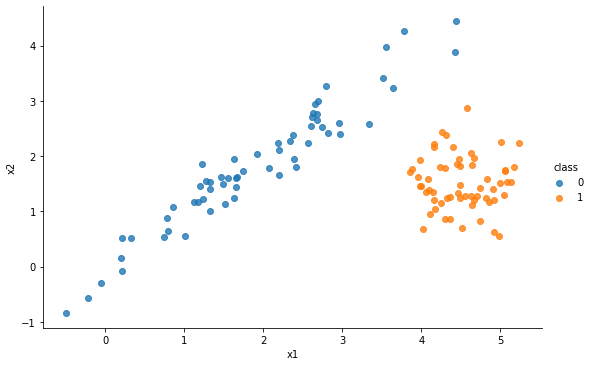

In [21]:
sns.lmplot(x="x1", y="x2", data=df, fit_reg=False, hue='class', legend=True, 
           height=5, aspect=1.5);

### Calculation for 3 clusters:

In [22]:
# k-means function is defined so that it returns the total error value as well
def k_means(dataset, k):
    """dataset argument should be given as numpy array, k as an integer"""
    import random

    # randomly select initial centroids
    np.random.shuffle(dataset) # mix the dataset
    initial_centroids = dataset[:k, :]

    # find closest centroids
    indexes = [] 
    
    for i in range(len(dataset)): # Go over every example
        distances = []
        for j in range(k): # loop over the clusters
            # calculate the distance
            distance = sum((dataset[i, :] - initial_centroids[j, :])**2)
            distances.append(distance) 
        # find closest centroid and store the centroid of closest to example i 
        indexes.append(distances.index(min(distances)))

    indexes = np.array(indexes)
    
    # compute the new centroids by computing the means of the data points 
    # assigned to each centroid.

    centroids = np.zeros((k, dataset.shape[1]))
    for i in range(k): # Go over every centroid
        centroids[i, :] = np.mean(dataset[indexes[indexes==i], :], axis=0)
    
    # find the labels using the determined centroids with k-means algorithm
    indexes = [] 
    error = 0 # total error will be calculated this time to choose the centroid
    # which gives the lowest error

    for i in range(len(dataset)): # Go over every example
        distances = []
        for j in range(k): # loop over the clusters
            # calculate the distance
            distance = sum((dataset[i, :] - centroids[j, :])**2)
            distances.append(distance) 
        # find closest centroid and store the centroid of closest to example i 
        indexes.append(distances.index(min(distances))) 
        error += min(distances)
    indexes = np.array(indexes)

    return centroids, indexes, error

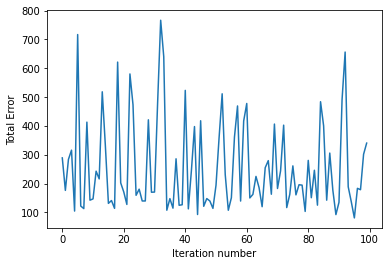

In [23]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cluster_data.csv", 
                   index_col=0)
data.rename(columns={"0": "x1", "1": "x2"}, inplace=True)

list_of_centroids = []
list_of_errors = []
# run k-means algorithm 100 times to select the centroids that give the lowest
# total error 
for i in range(100): 
    centroids, idx, error = k_means(data.values, 3)
    list_of_centroids.append(centroids)
    list_of_errors.append(error)

centroid = list_of_centroids[list_of_errors.index(min(list_of_errors))]
plt.plot(np.arange(0, 100), list_of_errors)
plt.xlabel("Iteration number")
plt.ylabel("Total Error")
plt.show()

In [24]:
# find the labels using the determined centroids with k-means algorithm which 
# gives the lowest error
indexes = [] 
for i in range(len(data.values)): # Go over every example
    distances = []
    for j in range(3): # loop over the clusters
        # calculate the distance
        distance = sum((data.values[i, :] - centroid[j, :])**2)
        distances.append(distance) 
    # find closest centroid and store the centroid of closest to example i 
    indexes.append(distances.index(min(distances))) 
indexes = np.array(indexes)

data["class"] = indexes
data.head()

,x1,x2,class
0,2.199507,1.650839,0
1,2.953332,2.601195,0
2,2.658968,2.936233,0
3,4.903416,1.405466,2
4,4.921767,1.197063,2


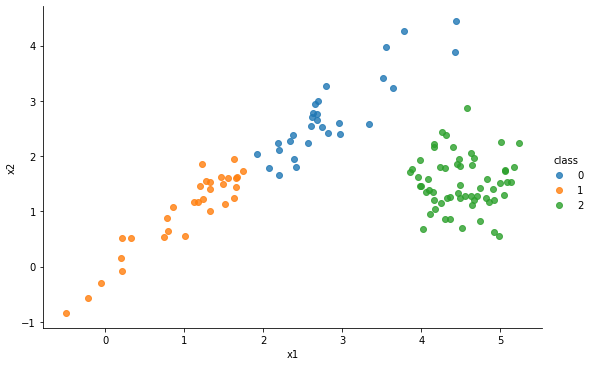

In [25]:
sns.lmplot(x="x1", y="x2", data=data, fit_reg=False, hue='class', legend=True, 
           height=5, aspect=1.5);

## Question 4 Solution

Summary for Expectation Maximization Algorithm:  
  
For K Clusters and N data points:  

Z --> latent variables --> $Z=\{Z_1, Z_2...Z_N\}$  
X --> data --> $X=\{X_1, X_2...X_N\}$  
$\Pi$  --> Mixture proportion  
$\mu$ --> mean vector  
$\Sigma$ --> Covariance matrix  

In the EM class defined below, first we initialize mean vectors, covariance matrices, mixture proportions and expected labels considering the given dataset and number of gaussian mixtures we want to find. The expectation method in the EM class represents the expectation step of gaussian mixture model and the formula given below is used in this step:  
$$E[Z_{nk}] = \frac{\mathcal{N}(X_n; \mu_k^i, \Sigma_k^i)\Pi_k^i}{\sum_{k'}^{K} \mathcal{N}(X_n;\mu_{k'}^i,\Sigma_{k'}^i)\Pi_{k'}^i}$$


The maximization method in code represents the maximization step of the gaussian mixture model and the formulas given below are used in this step:
$$\mu_k^{i+1} = \frac{\sum_{n=1}^N E[Z_{nk}]X_n}{\sum_{n'=1}^N E[Z_{n'k}]}$$  
$$\Sigma_k^{i+1} = \frac{\sum_{n=1}^N E[Z_{nk}](X_n-\mu_k^{i+1})^T(X_n-\mu_k^{i+1})}{\sum_{n'=1}^N E[Z_{n'k}]}$$  
$$\Pi_k^{i+1} = \frac{\sum_{n=1}^N E[Z_{nk}]}{N}$$  


Note that, in the formulas 'n' represents a single instance of features and 'k' represents a single mixture of gaussian mixtures or clusters.

And finally with the train method in the EM class we loop through the expectation and maximization steps to with the given number of iteration.


In [2]:
from scipy.stats import multivariate_normal   

class EM:
    """EM class for expectation maximization algorithm"""


    def __init__(self, features, k):
        """Initilization parameters"""

        np.random.shuffle(features) # mix the dataset
        self.features = np.vstack(features) # Inputs always vertically stacked
        # Number of rows and columns of features:
        self.rows, self.cols = np.shape(self.features)
        
        # Initial means of clusters (Gaussian mixture)
        self.mu = [np.random.randn(self.cols) for i in range(k)] 

        # Initial covariance matrices:
        self.cov = [np.eye(self.cols) for i in range(k)] 

        # Initial cluster (mixture) proportions
        self.pi = np.array([1/k for i in range(k)]) 

        self.k = k # Number of clusters (gaussian mixtures)
         
        self.EZ = np.zeros([self.rows, k]) # Initialize expected labels


    def expectation(self):
        """ The expectation part of the EM algorithm.
        This method finds the expected labels of each instance."""

        for n in range(self.rows): # loop over the number of instances
            denominator = 0.0
            for i in range(self.k): # loop over the number of clusters 
                # calculate the denominator for e step
                denominator += self.pi[i] * multivariate_normal.pdf(
                    self.features[n], self.mu[i],self.cov[i])
                
            for i in range(self.k): # loop over the number of clusters
                # calculate the numerator for e step
                numerator = self.pi[i] * multivariate_normal.pdf(
                    self.features[n], self.mu[i], self.cov[i])
                
                # determine the expected labels
                self.EZ[n, i] = numerator / denominator


    def maximization(self, features, labels):
        """ The maximization part of the EM algorithm.
        This method finds the maximum likelihood parameters of the model."""

        for i in range(self.k): # loop over the number of clusters
            num_k = np.sum(labels[:, i]) # number of samples of the cluster
            self.pi[i] = num_k / self.rows # calculate gaussian mix. proportions

            self.mu[i] = 0.0
            for n in range(self.rows): # loop over the number of instances
                # calculate the mean of each cluster
                self.mu[i] += labels[n, i] * features[n] / num_k 

            self.cov[i] = np.zeros([self.cols, self.cols])
            for n in range(self.rows): # loop over the number of instances
                # calculate the covariance matrix of each cluster
                self.cov[i] += labels[n, i] * (np.vstack(features[n] - 
                            self.mu[i]) * (features[n] - self.mu[i])) / num_k


    def train(self, num_iteration):
        """This method trains the gaussian mixture model with the EM algorithm.
        """

        for i in range(num_iteration):
            self.expectation()
            self.maximization(self.features, self.EZ)

### Calculation for 2 Clusters

In [89]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cluster_data.csv", 
                   index_col=0)
data.rename(columns={"0": "x1", "1": "x2"}, inplace=True)
data.head()

,x1,x2
0,2.336858,2.265735
1,1.327879,1.535489
2,2.822353,2.418167
3,1.521233,1.140626
4,2.953332,2.601195


In [90]:
em = EM(data.values, 2)
em.train(20)

In [91]:
for i in range(2):
    print('Mean', i+1, ' = ', em.mu[i])
    print('Covariance matrix', i+1, ' = ', em.cov[i])
    print('Mixture proportion', i+1, ' = ', em.pi[i], '\n')

Mean 1  =  [1.89525403 1.82754056]
Covariance matrix 1  =  [[1.21050071 1.18529665]
 [1.18529665 1.24951325]]
Mixture proportion 1  =  0.49968231767210747 

Mean 2  =  [4.50707416 1.5135706 ]
Covariance matrix 2  =  [[ 0.13952766 -0.00418978]
 [-0.00418978  0.23030495]]
Mixture proportion 2  =  0.5003176823278925 



In [92]:
# find the labels using the determined EZ values from EM algorithm
data["class"] = np.argmax(em.EZ, axis=1)
data.head()

,x1,x2,class
0,2.336858,2.265735,0
1,4.254276,2.426983,1
2,1.556767,1.596623,0
3,4.923070,0.621654,1
4,4.493142,1.478566,1


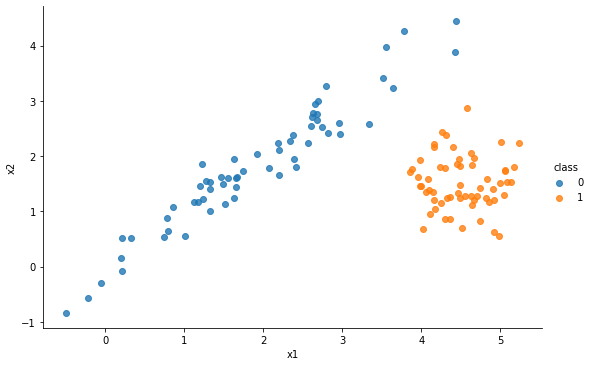

In [93]:
sns.lmplot(x="x1", y="x2", data=data, fit_reg=False, hue='class', legend=True, 
           height=5, aspect=1.5);

### Calculation for 3 Clusters

In [21]:
data = pd.read_csv("cluster_data.csv", index_col=0)
data.rename(columns={"0": "x1", "1": "x2"}, inplace=True)
data.head()

,x1,x2
0,2.336858,2.265735
1,1.327879,1.535489
2,2.822353,2.418167
3,1.521233,1.140626
4,2.953332,2.601195


In [22]:
em = EM(data.values, 3)
em.train(20)

In [23]:
for i in range(3):
    print(f"Mean vector of gaussian mixture {i+1}: {em.mu[i]}")
    print(f"Covariance matrix of gaussian mixture {i+1}: {em.cov[i]}")
    print(f"Proportion of gaussian mixture {i+1}: {em.pi[i]}\n\n")

Mean vector of gaussian mixture 1: [-0.14738064 -0.45711076]
Covariance matrix of gaussian mixture 1: [[0.0722715  0.07916083]
 [0.07916083 0.0879972 ]]
Proportion of gaussian mixture 1: 0.031393553577054215


Mean vector of gaussian mixture 2: [2.03239799 1.98079951]
Covariance matrix of gaussian mixture 2: [[0.98846376 0.9256119 ]
 [0.9256119  0.95391713]]
Proportion of gaussian mixture 2: 0.46836281254332757


Mean vector of gaussian mixture 3: [4.50724573 1.51340923]
Covariance matrix of gaussian mixture 3: [[ 0.13934795 -0.00400517]
 [-0.00400517  0.2301603 ]]
Proportion of gaussian mixture 3: 0.5002436338796183




In [24]:
# find the labels using the determined EZ values from EM algorithm
data["class"] = np.argmax(em.EZ, axis=1)
data.head()

,x1,x2,class
0,2.738961,2.519895,1
1,-0.223242,-0.575942,0
2,4.903416,1.405466,2
3,1.624432,1.234454,1
4,4.361978,0.870050,2


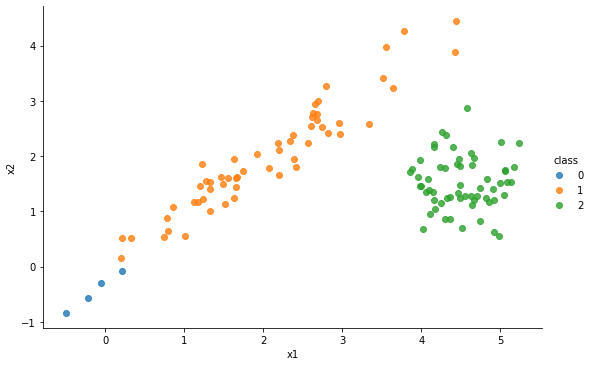

In [25]:
sns.lmplot(x="x1", y="x2", data=data, fit_reg=False, hue='class', legend=True, 
           height=5, aspect=1.5);